In [4]:
# set up imports
import numpy
import statsmodels.nonparametric.smoothers_lowess
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import torch

In [6]:
from behavior_model_fitting.helpers.policy import softmax

In [7]:
learning_rate=0.001

# probability of reward for the two responses
p_A=0.75

def softmax(q,temp):
        p=numpy.exp(q[0]/temp)/(numpy.exp(q[0]/temp)+numpy.exp(q[1]/temp))
        if p>numpy.random.rand():
            return 0
        else:
            return 1
        
def outcome(resp,p_A):
    if numpy.random.rand()<p_A:
        rewarded_outcome=1
    else:
        rewarded_outcome=0
    if resp==rewarded_outcome:
        return 1
    else:
        return 0

In [8]:
ntrials=1000
temp=0.1

q=[0.0,0,0]

resp=numpy.zeros(ntrials)
reward=numpy.zeros(ntrials)
correct=numpy.zeros(ntrials)


for i in range(ntrials):
    resp[i]=softmax(q,temp)
    reward[i]=outcome(resp[i],p_A)
    correct[i]=resp[i]==1
    q[int(resp[i])]=q[int(resp[i])] + learning_rate*(reward[i]-q[int(resp[i])])

In [9]:
blocksize=20
nblocks=int(ntrials/blocksize)
block_reward=numpy.zeros(nblocks)
for i in range(nblocks):
    block_trials=numpy.arange(i*blocksize,(i+1)*blocksize)
    block_reward[i]=numpy.mean(resp[block_trials]==1)

Text(0, 0.5, 'Proportion optimal responses')

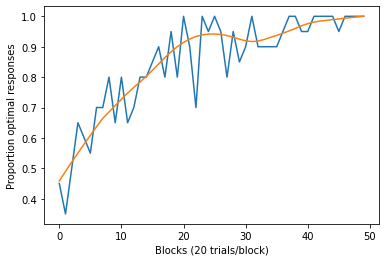

In [10]:
plt.plot(block_reward)
smooth=statsmodels.nonparametric.smoothers_lowess.lowess(block_reward,numpy.arange(block_reward.shape[0]),frac=0.33)
plt.plot(smooth[:,1])
plt.xlabel('Blocks (%d trials/block)'%blocksize)
plt.ylabel('Proportion optimal responses')